In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, optimizers

In [3]:
(train_data, train_labels), (test_data, test_label) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape

(25000,)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
word_index = imdb.get_word_index()

In [7]:
index_word = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
# converting dictionary into numpy array
def vectorize_sequences(sequences ,dimension=10000):
    results = np.zeros(shape=(len(sequences), dimension), dtype=float)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
train_tensor_data = vectorize_sequences(train_data)
test_tensor_data = vectorize_sequences(test_data)

In [11]:
train_tensor_data.shape

(25000, 10000)

In [12]:
train_tensor_data.dtype

dtype('float64')

In [13]:
network = models.Sequential()
network.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [21]:
x_val = train_tensor_data[:10000]
partial_x_train = train_tensor_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [22]:
x_val.shape

(10000, 10000)

In [23]:
y_val.shape

(10000,)

In [24]:
partial_x_train.shape

(15000, 10000)

In [25]:
partial_y_train.shape

(15000,)

In [26]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [27]:
history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
15000/15000 [==============================] - 5s 304us/sample - loss: 0.5218 - acc: 0.7681 - val_loss: 0.3903 - val_acc: 0.8710
Epoch 2/20
15000/15000 [==============================] - 1s 94us/sample - loss: 0.3095 - acc: 0.9047 - val_loss: 0.3154 - val_acc: 0.8793
Epoch 3/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.2258 - acc: 0.9277 - val_loss: 0.3140 - val_acc: 0.8722
Epoch 4/20
15000/15000 [==============================] - 1s 94us/sample - loss: 0.1796 - acc: 0.9422 - val_loss: 0.2771 - val_acc: 0.8889
Epoch 5/20
15000/15000 [==============================] - 1s 90us/sample - loss: 0.1424 - acc: 0.9575 - val_loss: 0.2876 - val_acc: 0.8843
Epoch 6/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.1207 - acc: 0.9621 - val_loss: 0.2986 - val_acc: 0.8821
Epoch 7/20
15000/1500

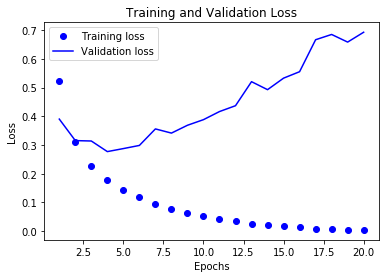

In [29]:
history_dict = history.history
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
acc = history_dict['acc']
validation_acc = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

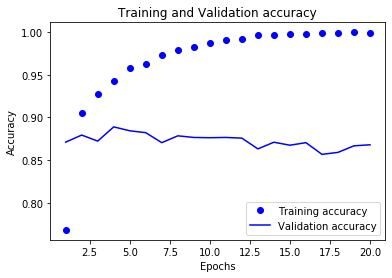

In [32]:
plt.title('Training and Validation accuracy')
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [35]:
network.evaluate(test_tensor_data, test_label)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7625787060189247, 0.85164]